In [63]:
import random
import numpy as np
import matplotlib.pyplot as plt


In [64]:
def simulate_coin_tosses(n_tosses=100, p=0.5):
    return [1 if random.random() < p else 0 for _ in range(n_tosses)]

def count_heads(results):
    return sum(results)

def has_series_of_n(results, n=5):
    max_series = 0
    current_series = 0
    
    for result in results:
        if result == 1:
            current_series += 1
            max_series = max(max_series, current_series)
        else:
            current_series = 0
    return max_series >= n, max_series



In [65]:
n_tosses = 100
n_simulations = 10000

print("ЭКСПЕРИМЕНТ С СИММЕТРИЧНОЙ МОНЕТОЙ (p=0.5)\n")

heads_counts = []
series_5_exists = []
max_series_lengths = []

for _ in range(n_simulations):
    results = simulate_coin_tosses(n_tosses)
    heads_count = count_heads(results)
    heads_counts.append(heads_count)
    
    has_series, max_series = has_series_of_n(results, 5)
    series_5_exists.append(has_series)
    max_series_lengths.append(max_series)

heads_counts = np.array(heads_counts)
series_5_exists = np.array(series_5_exists)
max_series_lengths = np.array(max_series_lengths)

mean_heads = np.mean(heads_counts)
print(f"1. Среднее число орлов: {mean_heads:.2f}")

prob_more_than_60 = np.mean(heads_counts > 60)
print(f"\n2. Вероятность получить >60 орлов: {prob_more_than_60:.4f}")

n_intervals = 10
intervals = [(i, i+10) for i in range(0, 100, 100 // n_intervals)]
interval_probs = []

print("\n3. Вероятности по интервалам:")
for i, (start, end) in enumerate(intervals):
    prob = np.mean((heads_counts >= start) & (heads_counts < end))
    interval_probs.append(prob)
    print(f"[{start:3d}, {end:3d}]: {prob:.4f}")

alpha = 0.05
lower_bound = np.percentile(heads_counts, alpha/2 * 100)
upper_bound = np.percentile(heads_counts, (1 - alpha/2) * 100)
interval_width = upper_bound - lower_bound

print(f"\n4. 95% предсказательный интервал: [{lower_bound:.1f}, {upper_bound:.1f}]")
print(f"Ширина интервала: {interval_width:.1f}")

prob_series_5 = np.mean(series_5_exists)
print(f"\n5. Вероятность серии из 5 орлов подряд: {prob_series_5:.4f}")


ЭКСПЕРИМЕНТ С СИММЕТРИЧНОЙ МОНЕТОЙ (p=0.5)

1. Среднее число орлов: 49.90

2. Вероятность получить >60 орлов: 0.0168

3. Вероятности по интервалам:
[  0,  10]: 0.0000
[ 10,  20]: 0.0000
[ 20,  30]: 0.0000
[ 30,  40]: 0.0203
[ 40,  50]: 0.4495
[ 50,  60]: 0.5020
[ 60,  70]: 0.0281
[ 70,  80]: 0.0001
[ 80,  90]: 0.0000
[ 90, 100]: 0.0000

4. 95% предсказательный интервал: [40.0, 60.0]
Ширина интервала: 20.0

5. Вероятность серии из 5 орлов подряд: 0.8041


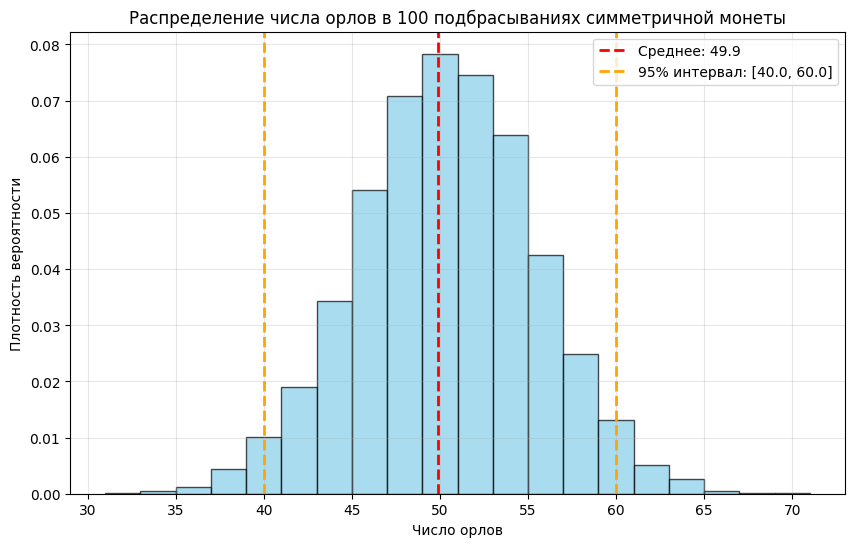

In [66]:
plt.figure(figsize=(10, 6))
plt.hist(heads_counts, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(mean_heads, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_heads:.1f}')
plt.axvline(lower_bound, color='orange', linestyle='--', linewidth=2, label=f'95% интервал: [{lower_bound:.1f}, {upper_bound:.1f}]')
plt.axvline(upper_bound, color='orange', linestyle='--', linewidth=2)
plt.xlabel('Число орлов')
plt.ylabel('Плотность вероятности')
plt.title('Распределение числа орлов в 100 подбрасываниях симметричной монеты')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

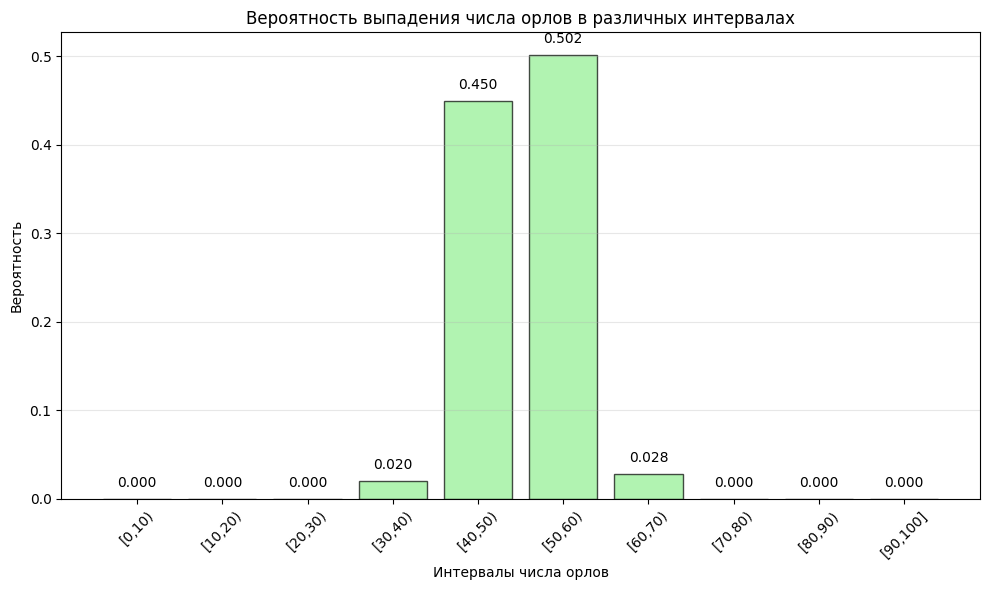

In [67]:
plt.figure(figsize=(10, 6))
interval_labels = [f'[{start},{end})' for start, end in intervals[:-1]] + ['[90,100]']
x_pos = np.arange(len(interval_labels))

plt.bar(x_pos, interval_probs, color='lightgreen', alpha=0.7, edgecolor='black')
plt.xlabel('Интервалы числа орлов')
plt.ylabel('Вероятность')
plt.title('Вероятность выпадения числа орлов в различных интервалах')
plt.xticks(x_pos, interval_labels, rotation=45)

for i, v in enumerate(interval_probs):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [68]:
print("\nАНАЛИЗ ДЛЯ НЕСИММЕТРИЧНОЙ МОНЕТЫ")

p_values = np.linspace(0.05, 0.95, 19)
n_simulations_p = 10000

mean_heads_by_p = []
interval_widths_by_p = []
prob_series_5_by_p = []
mean_max_series_by_p = []

for p in p_values:
    heads_counts_p = []
    series_5_exists_p = []
    max_series_p = []
    
    for _ in range(n_simulations_p):
        results = simulate_coin_tosses(n_tosses, p)
        heads_count = count_heads(results)
        heads_counts_p.append(heads_count)
        
        has_series, max_series = has_series_of_n(results, 5)
        series_5_exists_p.append(has_series)
        max_series_p.append(max_series)
    
    heads_counts_p = np.array(heads_counts_p)
    
    mean_heads_by_p.append(np.mean(heads_counts_p))
    
    lower = np.percentile(heads_counts_p, 2.5)
    upper = np.percentile(heads_counts_p, 97.5)
    interval_widths_by_p.append(upper - lower)
    
    prob_series_5_by_p.append(np.mean(series_5_exists_p))
    
    mean_max_series_by_p.append(np.mean(max_series_p))




АНАЛИЗ ДЛЯ НЕСИММЕТРИЧНОЙ МОНЕТЫ


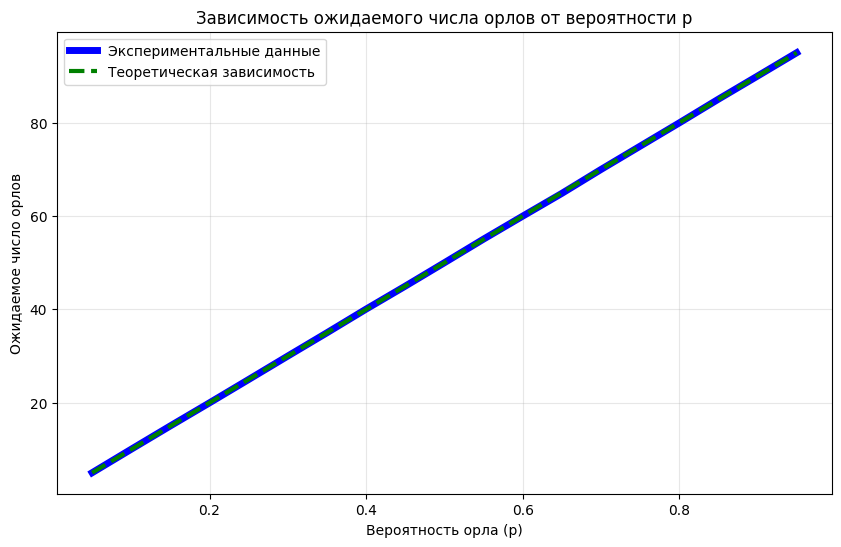

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(p_values, mean_heads_by_p, 'b-', linewidth=5, markersize=6, label='Экспериментальные данные')
plt.plot(p_values, [100*p for p in p_values], 'g--', linewidth=3, label='Теоретическая зависимость')
plt.xlabel('Вероятность орла (p)')
plt.ylabel('Ожидаемое число орлов')
plt.title('Зависимость ожидаемого числа орлов от вероятности p')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

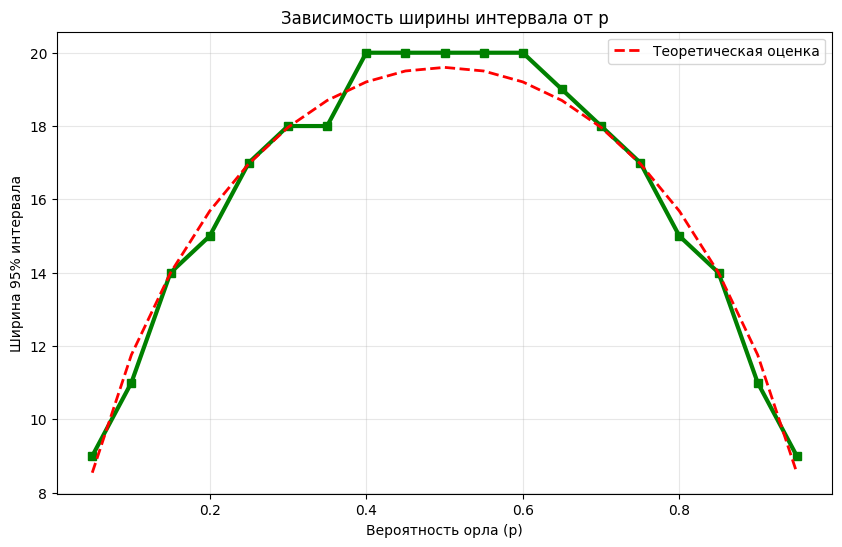

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(p_values, interval_widths_by_p, 'g-', linewidth=3, marker='s', markersize=6)
plt.xlabel('Вероятность орла (p)')
plt.ylabel('Ширина 95% интервала')
plt.title('Зависимость ширины интервала от p')
plt.grid(True, alpha=0.3)

theoretical_widths = [2 * 1.96 * np.sqrt(100 * p * (1-p)) for p in p_values]
plt.plot(p_values, theoretical_widths, 'r--', linewidth=2, label='Теоретическая оценка')
plt.legend()

plt.show()

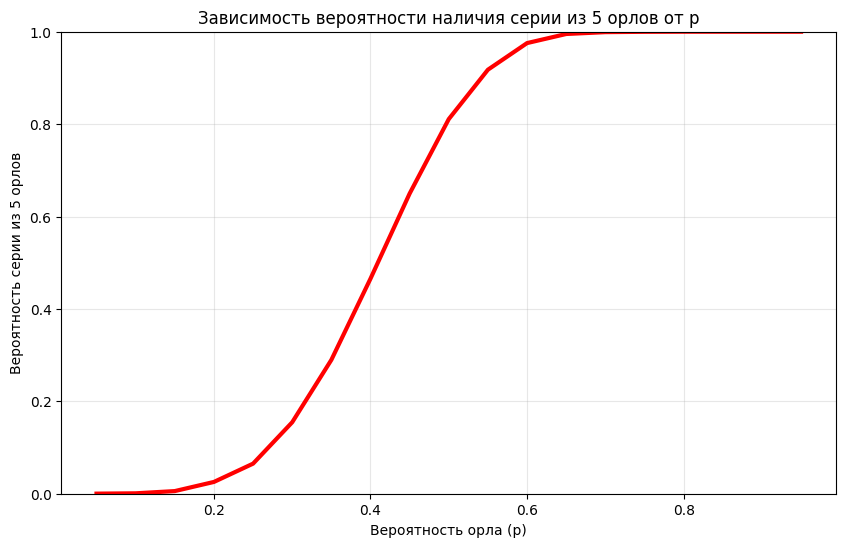

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(p_values, prob_series_5_by_p, 'r-', linewidth=3, markersize=6)
plt.xlabel('Вероятность орла (p)')
plt.ylabel('Вероятность серии из 5 орлов')
plt.title('Зависимость вероятности наличия серии из 5 орлов от p')
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.show()

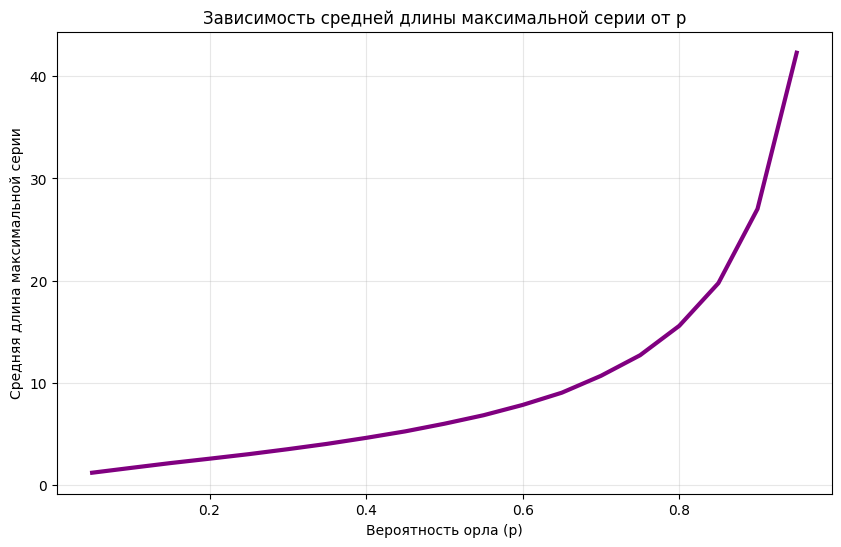

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(p_values, mean_max_series_by_p, 'purple', linewidth=3, markersize=6)
plt.xlabel('Вероятность орла (p)')
plt.ylabel('Средняя длина максимальной серии')
plt.title('Зависимость средней длины максимальной серии от p')
plt.grid(True, alpha=0.3)
plt.show()